In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [10]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


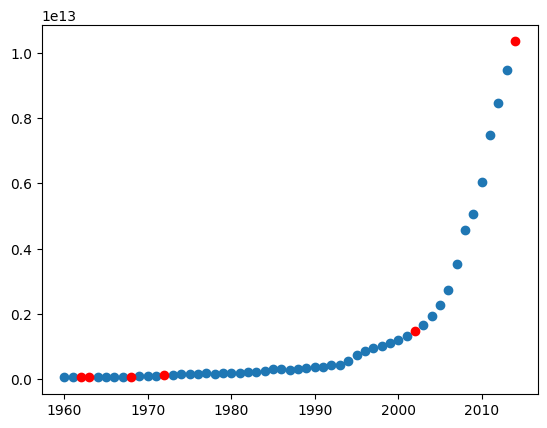

In [14]:
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

train_x = np.asanyarray(train[["Year"]])
train_y = np.asanyarray(train[["Value"]])

test_x = np.asanyarray(test[["Year"]])
test_y = np.asanyarray(test[["Value"]])

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y,color = "red")

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=3)

train_poly_x = poly.fit_transform(train_x)

train_poly_x[np.arange(0,5)]

array([[1.00000000e+00, 1.96000000e+03, 3.84160000e+06, 7.52953600e+09],
       [1.00000000e+00, 1.96100000e+03, 3.84552100e+06, 7.54106668e+09],
       [1.00000000e+00, 1.96400000e+03, 3.85729600e+06, 7.57572934e+09],
       [1.00000000e+00, 1.96500000e+03, 3.86122500e+06, 7.58730712e+09],
       [1.00000000e+00, 1.96600000e+03, 3.86515600e+06, 7.59889670e+09]])

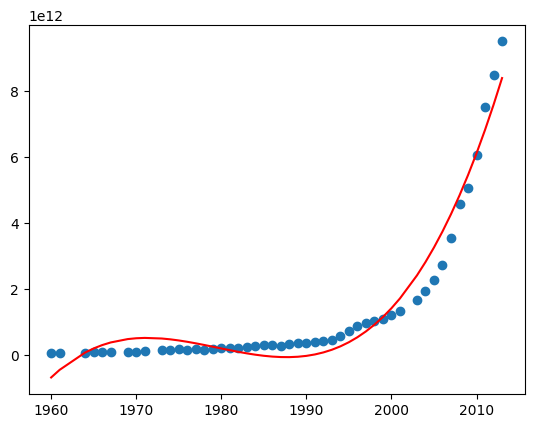

In [40]:
regr = linear_model.LinearRegression()
regr.fit(train_poly_x,train_y)

yy,xx = regr.intercept_[0]+regr.coef_[0][1]*xx+regr.coef_[0][2]*xx**2+regr.coef_[0][3]*xx**3 ,train_x
plt.scatter(train_x,train_y)
plt.plot(xx,yy,'r')

In [47]:
test_poly_x = poly.fit_transform(test_x)
round(regr.score(test_poly_x,test_y),3)

0.977